In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder



In [2]:
## reading the csv file
df=pd.read_csv("BlackFriday.csv")
copy_df=df.copy()
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Text(0.5, 1, 'Highest Purchasing Age Group')

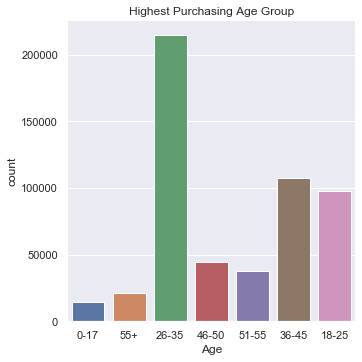

In [3]:
# DATA VISUALIZATION

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style= "darkgrid")
sns.catplot(x="Age", kind="count",data=copy_df);
plt.title('Highest Purchasing Age Group')



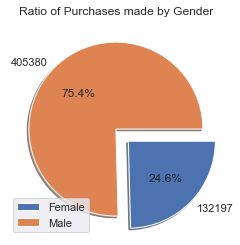

In [4]:
countF = copy_df[copy_df['Gender'] == 'F'].count() 
countM = copy_df[copy_df['Gender'] == 'M'].count() 

values= [countF.Gender,countM.Gender]
labels = ['Female', 'Male']
explode = (0.2, 0)
plt.pie(values, labels= values,explode=explode,autopct='%1.1f%%',counterclock=False, shadow=True)
plt.title('Ratio of Purchases made by Gender')
plt.legend(labels,loc=3)
plt.show()

Text(0.5, 1, 'Highest Purchasing Occupation')

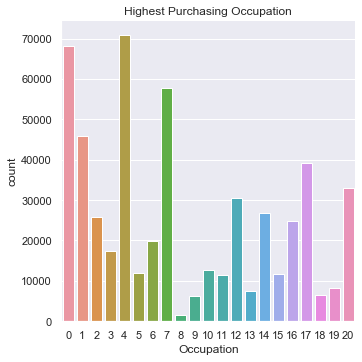

In [5]:
sns.set(style= "darkgrid")
sns.catplot(x="Occupation", kind="count",data=copy_df);
plt.title('Highest Purchasing Occupation')

Text(0.5, 1, 'Highest Purchasing City Category')

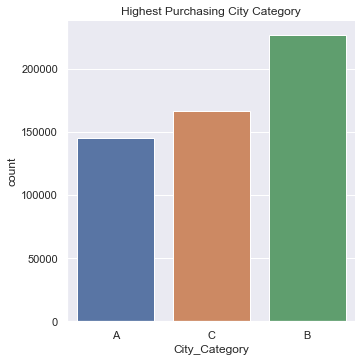

In [6]:
sns.set(style= "darkgrid")
sns.catplot(x="City_Category", kind="count",data=copy_df);
plt.title('Highest Purchasing City Category')

Text(0.5, 1, 'Highest Purchasing Stay_In_Current_City_Years')

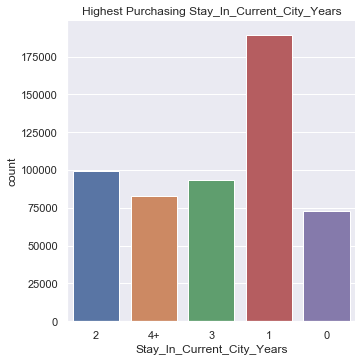

In [7]:
sns.set(style= "darkgrid")
sns.catplot(x="Stay_In_Current_City_Years", kind="count",data=copy_df);
plt.title('Highest Purchasing Stay_In_Current_City_Years')

Text(0.5, 1, 'Highest Purchasing Marital_Status')

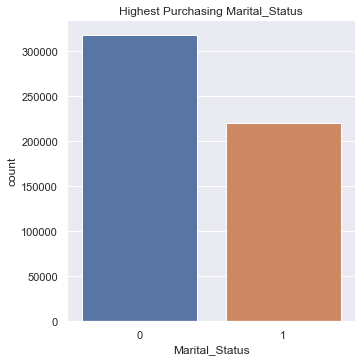

In [8]:
sns.set(style= "darkgrid")
sns.catplot(x="Marital_Status", kind="count",data=copy_df);
plt.title('Highest Purchasing Marital_Status')

In [9]:
## Label encoder

encoder=LabelEncoder()

df["Product_ID"]=encoder.fit_transform(df["Product_ID"])
df["Gender"]=encoder.fit_transform(df["Gender"])
df["Age"]=encoder.fit_transform(df["Age"])
df["Occupation"]=encoder.fit_transform(df["Occupation"])
df["City_Category"]=encoder.fit_transform(df["City_Category"])
df["Stay_In_Current_City_Years"]=encoder.fit_transform(df["Stay_In_Current_City_Years"])
df["Marital_Status"]=encoder.fit_transform(df["Marital_Status"])
df["Product_Category_1"]=encoder.fit_transform(df["Product_Category_1"])
df["Product_Category_2"]=encoder.fit_transform(df["Product_Category_2"])
df["Product_Category_3"]=encoder.fit_transform(df["Product_Category_3"])
#df["Purchase"]=encoder.fit_transform(df["Purchase"])

df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,670,0,0,10,0,2,0,2,167002,153346,8370
1,1000001,2374,0,0,10,0,2,0,0,4,10,15200
2,1000001,850,0,0,10,0,2,0,11,4402,226673,1422
3,1000001,826,0,0,10,0,2,0,11,12,226672,1057
4,1000002,2732,1,6,16,2,4,0,7,4368,226671,7969


In [10]:
## Spilting the data set

columns_x=df.columns
columns_x=columns_x[0:len(columns_x)-1]
x=df[columns_x].values
y=df["Purchase"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



In [11]:
# Apply the Random Forest Regressor

random_forest_reg=RandomForestRegressor(n_estimators=10)

# fit the model

random_forest_reg.fit(x_train,y_train)

# Calculate the mean absolute error
print("Accuracy for train data =",metrics.mean_absolute_error(y_train,random_forest_reg.predict(x_train))
)
print("\nAccuracy for test data =",metrics.mean_absolute_error(y_test,random_forest_reg.predict(x_test))
)

Accuracy for train data = 826.682193921327

Accuracy for test data = 2114.051975519923


In [12]:
## LINEAR REGRESSSION
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
# Calculate the mean absolute error
print("Accuracy for train data =",metrics.mean_absolute_error(y_train,reg.predict(x_train))
)
print("\nAccuracy for test data =",metrics.mean_absolute_error(y_test,reg.predict(x_test))
)

Accuracy for train data = 3570.955499943411

Accuracy for test data = 3578.4161630117787


In [13]:
## DECISION TREE
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf.fit(x_train,y_train)
# Calculate the mean absolute error
print("Accuracy for train data =",metrics.mean_absolute_error(y_train,clf.predict(x_train))
)
print("\nAccuracy for test data =",metrics.mean_absolute_error(y_test,clf.predict(x_test))
)

Accuracy for train data = 0.0

Accuracy for test data = 2682.8117768518173


In [14]:
# GRADIENT BOOSTING REGRESSOR
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)
regressor.fit(x_train, y_train)
# Calculate the mean absolute error
print("Accuracy for train data =",metrics.mean_absolute_error(y_train,regressor.predict(x_train))
)
print("\nAccuracy for test data =",metrics.mean_absolute_error(y_test,regressor.predict(x_test))
)

Accuracy for train data = 2536.1304171339266

Accuracy for test data = 2548.009907599416


In [20]:
train_error=[metrics.mean_absolute_error(y_train,random_forest_reg.predict(x_train)),metrics.mean_absolute_error(y_train,reg.predict(x_train))
,287.24196024146164,metrics.mean_absolute_error(y_train,regressor.predict(x_train))]
train_error

[826.682193921327, 3570.955499943411, 287.24196024146164, 2536.1304171339266]

In [21]:
test_error=[metrics.mean_absolute_error(y_test,random_forest_reg.predict(x_test)),metrics.mean_absolute_error(y_test,reg.predict(x_test))
,metrics.mean_absolute_error(y_test,clf.predict(x_test)),metrics.mean_absolute_error(y_test,regressor.predict(x_test))]
test_error

[2114.051975519923, 3578.4161630117787, 2682.8117768518173, 2548.009907599416]

In [22]:
models=["Random Forest","Linear Regression","Decision Tree","Gradient Boosting Regressor"]
models

['Random Forest',
 'Linear Regression',
 'Decision Tree',
 'Gradient Boosting Regressor']

In [23]:
from pandas import DataFrame,Series
col={'Train Error':train_error,'Test Error':test_error}
df_error=DataFrame(data=col,index=models)
df_error

,Train Error,Test Error
Random Forest,826.682194,2114.051976
Linear Regression,3570.955500,3578.416163
Decision Tree,287.241960,2682.811777
Gradient Boosting Regressor,2536.130417,2548.009908


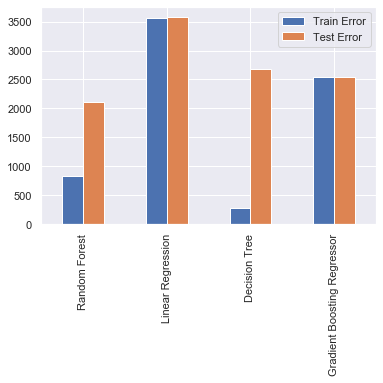

In [24]:
df_error.plot(kind='bar')


In [26]:
score_train=[]
score_test=[]
for i in range(5, 25):
    print(i)
    random_forest_reg=RandomForestRegressor(n_estimators=i)
    random_forest_reg.fit(x_train,y_train)
    score_train.append(random_forest_reg.score(x_train,y_train))
    score_test.append(random_forest_reg.score(x_test,y_test))

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [ ]:
train_score=np.array(score_train)
x_axis=np.arange(5,25)
import matplotlib.pyplot as plt
plt.scatter(x_axis, train_score)
plt.xlabel("n_estimators")
plt.ylabel("training score")
plt.title("Training score vs no of trees")
plt.legend()
train_score
